<a href="https://colab.research.google.com/github/eubielaraujo/Confusion_Matrix/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns

In [18]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalizar
train_images, test_images = train_images / 255.0, test_images / 255.0

# escolher classes (cat=3, dog=5)
wished_class = [3, 5]

# filtrar treino
mask_train = np.isin(train_labels, wished_class).flatten()
X_train = train_images[mask_train]
y_train = train_labels[mask_train]

# filtrar teste
mask_test = np.isin(test_labels, wished_class).flatten()
X_test = test_images[mask_test]
y_test = test_labels[mask_test]

# reatribuir rótulos (cat=0, dog=1)
y_train = (y_train == 5).astype(int)
y_test = (y_test == 5).astype(int)

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # saída binária

In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,
          y_train,
          epochs=5,
          validation_data=(X_test, y_test))

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.5484 - loss: 0.6813 - val_accuracy: 0.6425 - val_loss: 0.6339
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.6610 - loss: 0.6180 - val_accuracy: 0.7040 - val_loss: 0.5546
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7230 - loss: 0.5491 - val_accuracy: 0.7085 - val_loss: 0.5469
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.7410 - loss: 0.5187 - val_accuracy: 0.7130 - val_loss: 0.5537
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.7636 - loss: 0.4890 - val_accuracy: 0.7375 - val_loss: 0.5160


In [55]:
y_true = y_test.flatten()  # rótulos reais 0 ou 1
y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()  # previsões 0 ou 1

cm = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()

cm_norm = cm.astype("float") / cm.sum()

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


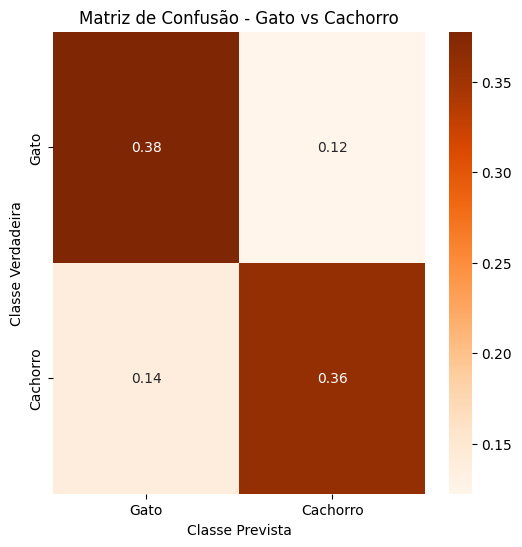

In [63]:
# Visualizar a matriz de confusão
plt.figure(figsize=(6, 6))
sns.heatmap(cm_norm, annot=True, cmap='Oranges',
              xticklabels=['Gato', 'Cachorro'],
              yticklabels=['Gato', 'Cachorro'])
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão - Gato vs Cachorro')
plt.show()

In [64]:
sens = cm[0,0] / (cm[0,0] + cm[0,1])
esp = cm[1,1] / (cm[1,0] + cm[1,1])
acc = (cm[0,0] + cm[1,1]) / (cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])
prec = cm[0,0] / (cm[0,0] + cm[1,0])
f1 = 2 * (prec * sens) / (prec + sens)

print(f"Sensibilidade: {sens} \nEspecificidade: {esp} \nAcurácia: {acc} \nPrecisão: {prec} \nF-score: {f1}")



Sensibilidade: 0.755 
Especificidade: 0.72 
Acurácia: 0.7375 
Precisão: 0.7294685990338164 
F-score: 0.742014742014742
